<a href="https://colab.research.google.com/github/Milad-Abdollahi/PersonalProjects/blob/main/PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch_Classification
This notebook contains 2 classification problems solved by PyTorch. both datasets are created using scikit-learn Toy datasets.
more information about scikit-learn Toy datasets at: https://scikit-learn.org/stable/datasets/toy_dataset.html


# First dataset: make circles
this tool Makes a large circle containing a smaller circle in 2d.
A simple toy dataset to visualize clustering and classification algorithms

the goal of using PyTorch is to Create a neural network that can predict the lable of a given point based on its location on the 2d screen.

therefore the model shoud have 2 inputs(X coordinate and Y coordinate) and predict 1 output(the label). so it is a binary classification problem

In [ ]:
# importing the necessary libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# creating the dataset:
n_samples = 1000
X_circles, y_circles = make_circles(n_samples=n_samples, noise=0.03)

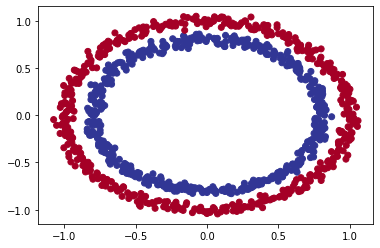

In [ ]:
# plotting the data
plt.scatter(x=X_circles[:,0], y=X_circles[:,1], c=y_circles, cmap=plt.cm.RdYlBu);

In [ ]:
# turning data into tensors
X_circles = torch.from_numpy(X_circles).type(torch.float32)
y_circles = torch.from_numpy(y_circles).type(torch.float32)

In [ ]:
# creating train test split:
X_circles_train, X_circles_test, y_circles_train, y_circles_test = train_test_split(X_circles, y_circles, test_size=0.2) 

In [ ]:
# defining a model class 
class Circles_model(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=8)
    self.layer2 = nn.Linear(in_features=8, out_features=8)
    self.layer3 = nn.Linear(in_features=8, out_features=1)
    self.relu = nn.ReLU()
  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

circle_model = Circles_model()

In [ ]:
y_circles_untrained_logits = circle_model(X_circles)
y_circles_untrained_pred_probs = torch.sigmoid(y_circles_untrained_logits)
y_circles_untrained_pred_labels = torch.round(y_circles_untrained_pred_probs)

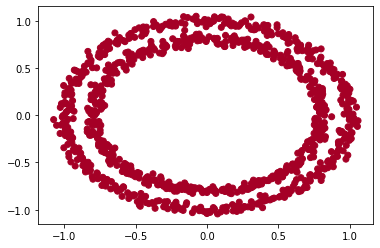

In [ ]:
# plotting the predictions using untrained model
plt.scatter(x=X_circles[:,0], y=X_circles[:,1], c=y_circles_untrained_pred_labels.detach().numpy(), cmap=plt.cm.RdYlBu)

In [ ]:
# creating a loss and an optimizer function
loss_fn_circles = nn.BCEWithLogitsLoss()

optimizer_circles = torch.optim.SGD(params=circle_model.parameters(), lr = 0.05)

In [ ]:
# Creating a training loop
epochs = 10000

for epoch in range(epochs):
  circle_model.train()
  y_circles_train_logits = circle_model(X_circles_train).squeeze()
  y_circles_train_loss = loss_fn_circles(y_circles_train_logits, y_circles_train)
  optimizer_circles.zero_grad()
  y_circles_train_loss.backward()
  optimizer_circles.step()
  if epoch % 1000 == 0:
    circle_model.eval()
    print(f'loss={y_circles_train_loss:.5f}')


loss=0.00119
loss=0.00114
loss=0.00109
loss=0.00105
loss=0.00101
loss=0.00098
loss=0.00095
loss=0.00092
loss=0.00089
loss=0.00086


In [ ]:
circle_model.eval()
with torch.inference_mode():
  y_circles_pred_labels = torch.round(torch.sigmoid(circle_model(X_circles)))

accuracy_score(y_circles, y_circles_pred_labels)

1.0

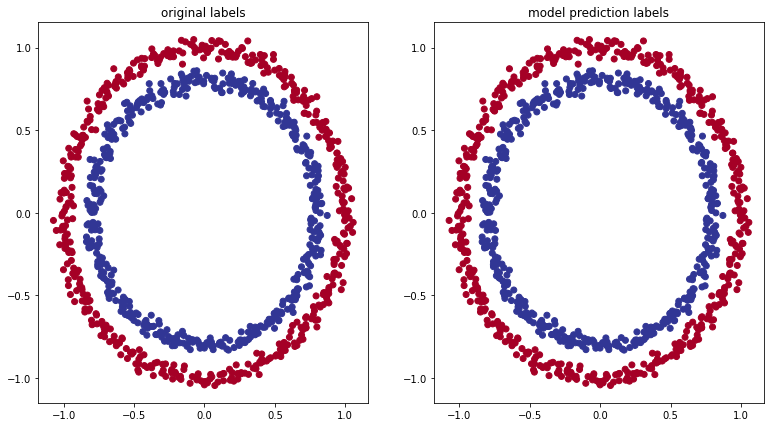

In [ ]:
plt.figure(figsize=(13,7))
plt.subplot(1, 2, 1)
plt.title('original labels')
plt.scatter(x=X_circles[:,0], y=X_circles[:,1], c=y_circles, cmap=plt.cm.RdYlBu)
plt.subplot(1, 2, 2)
plt.title('model prediction labels')
plt.scatter(x=X_circles[:,0], y=X_circles[:,1], c=y_circles_pred_labels, cmap=plt.cm.RdYlBu);

# Second dataset: make_blob
this tool generates isotropic Gaussian blobs for clustering.
number of output classes is 4 and a multi class classification model is needed to predict the output for this dataset


In [ ]:
# creating the dataset using sklearn
from sklearn.datasets import make_blobs

NUM_CLASSES = 4
NUM_FEATURES = 2
X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5,random_state=3)
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,y_blob,test_size=0.2)

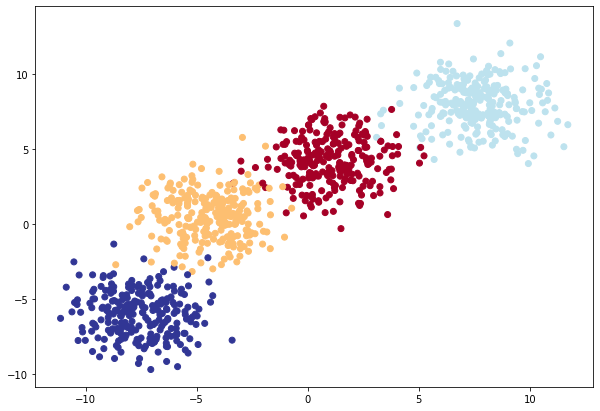

In [ ]:
# Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
# creating a model class
class Blob_Model(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=8)
    self.layer2 = nn.Linear(in_features=8, out_features=8)
    self.layer3 = nn.Linear(in_features=8, out_features=4)
    self.relu = nn.ReLU()
  def forward(self, x:torch.Tensor):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
  
blob_model = Blob_Model()


In [ ]:
y_blob_untrained_logits = blob_model(X_blob)
y_blob_untrained_pred_probs = torch.softmax(y_blob_untrained_logits, dim=1)
y_blob_untrained_pred_labels = torch.argmax(y_blob_untrained_pred_probs,dim=1)

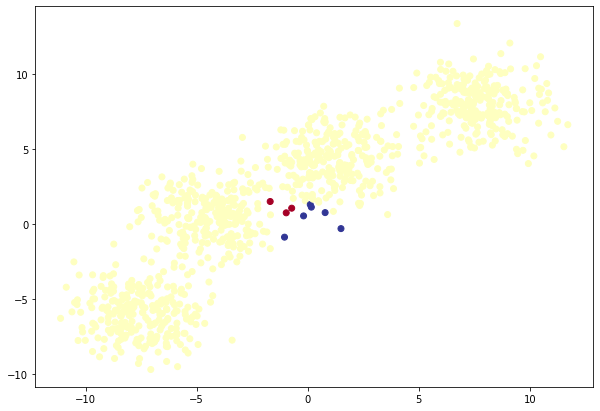

In [ ]:
# plotting the predictions using untrained model
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob_untrained_pred_labels, cmap=plt.cm.RdYlBu);

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_blob, y_blob_untrained_pred_labels)

0.252

In [ ]:
# definin a loss function and an optimizer
blob_loss_fn = nn.CrossEntropyLoss()

blob_optimizer = torch.optim.SGD(params=blob_model.parameters(), lr=0.01)

In [ ]:
# creating a training loop
epochs = 10000

for epoch in range(epochs):
  blob_model.train()
  y_blob_train_logits = blob_model(X_blob_train)
  loss_y_blob_train = blob_loss_fn(y_blob_train_logits, y_blob_train)
  blob_optimizer.zero_grad()
  loss_y_blob_train.backward()
  blob_optimizer.step()
  if epoch % (epochs/10) == 0:
    print(f'{loss_y_blob_train}')


0.048396963626146317
0.04827212169766426
0.04815484955906868
0.048049502074718475
0.047952111810445786
0.04785884916782379
0.0477699413895607
0.04768393933773041
0.04760100319981575
0.04752040281891823


In [ ]:
blob_model.eval()
with torch.inference_mode():
  y_blob_logits = blob_model(X_blob)
y_blob_pred_probs = torch.softmax(y_blob_logits, dim=1)
y_blob_pred_labels = torch.argmax(y_blob_pred_probs, dim=1)

In [ ]:
accuracy_score(y_blob, y_blob_pred_labels)

0.981

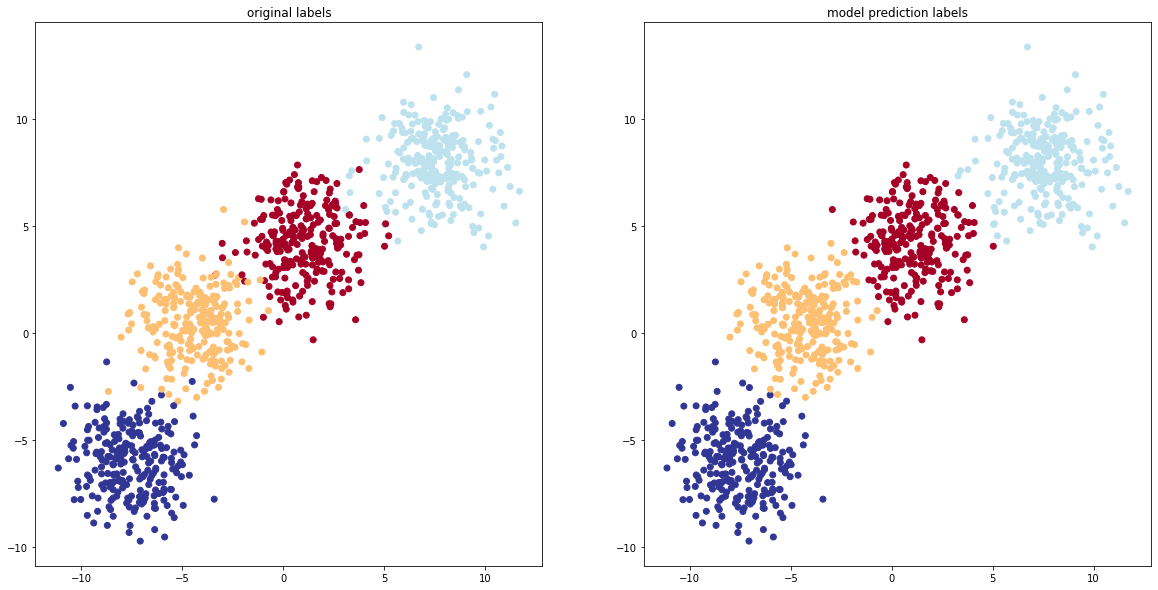

In [ ]:
# comparing original labels wih model predictions
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title('original labels')
plt.scatter(x=X_blob[:,0], y=X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)
plt.subplot(1, 2, 2)
plt.title('model prediction labels')
plt.scatter(x=X_blob[:,0], y=X_blob[:,1], c=y_blob_pred_labels, cmap=plt.cm.RdYlBu);